# YOLO - object detection
- YOLO — You Only Look Once — is an extremely fast multi object detection algorithm which uses convolutional neural network (CNN) to detect and identify objects.

- The neural network has this network architecture.
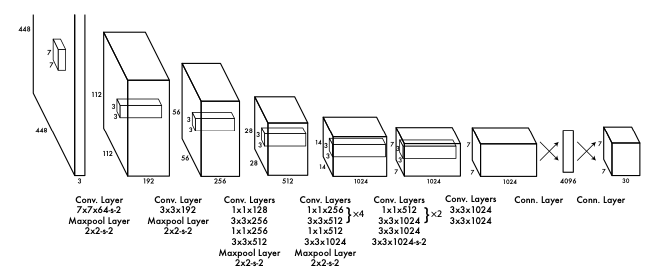
- The YOLO neural network has 254 components. You can print them to the console with:

        ln = net.getLayerNames()
        print(len(ln), ln)

# Import necessary files and libraries

In [1]:
# Yolo = You Only Look Once - Single Stage Detector
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
config_path = "E:/analytics/projects/yolo/yolov3.cfg"

# Weights are just like saving an already model
weights = "E:/analytics/projects/yolo/yolov3.weights"
labels = open("E:/analytics/projects/yolo/coco.names").read().strip().split("\n")

CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
# Intersection over union - IOU value used in object detection to measure the overlap of predicted vs actual box of object
IOU_THRESHOLD = 0.5

In [3]:
# Using DNN algorithm of openCV using load weights of trained yolov3 model
net = cv2.dnn.readNetFromDarknet(config_path, weights)

# Outline Border Colors

In [30]:
# Colors to pick for rectangle around the objects
colors = np.random.randint(0, 255, size = (len(labels), 3), dtype = 'uint8')

In [31]:
colors[0:3]

array([[246,  87, 169],
       [161, 133, 156],
       [191,  27, 233]], dtype=uint8)

# Model

## Blob
- The input to the network is a so-called blob object. The function cv.dnn.blobFromImage(img, scale, size, mean) transforms the image into a blob:

        blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

- It has the following parameters:
    - The image to transform
    - The scale factor (1/255 to scale the pixel values to [0..1])
    - The size, here a 416x416 square image
    - The mean value (default=0)
    - The option swapBR=True (since OpenCV uses BGR)

- A blob is a 4D numpy array object (images, channels, width, height).

In [14]:
# Model 
def model_output(path_name):
    image = cv2.imread(path_name)
    file_name = os.path.basename(path_name)  # Reading filename
    
    # File name & extension
    filename, ext = file_name.split(".")     # Seperating filename and it's extension(like jpg)
    h, w = image.shape[:2]
    
    # Preprocessing of image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416,416), swapRB = True, crop = False)
    
    # Set DNN (Yolo) model layer
    net.setInput(blob)
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]  #ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()] this is for older version
    
    # Output layer
    layer_outputs = net.forward(ln)
    boxes, confidences, class_ids = [], [], []
    
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            # multiclass probability to its class labels
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > CONFIDENCE:
                box = detection[:4]*np.array([w,h,w,h])
                # center coordinates of box , total width of object , total length of object
                (centerX, centerY, width, height) = box.astype("int")
                # start coordinate
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x,y,int(width), int(height)])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    return boxes, confidences, class_ids

In [37]:
def detection_recognition(path_name):
    image = cv2.imread(path_name)
    boxes, confidences, class_ids = model_output(path_name)
    
    # Id , Coordinates of Boxes, SCORE_THRESHOLD, IOU_THRESHOLD
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)
    font_scale = 1
    thickness = 2
    
    # Check if atleast one object is detected
    if len(idxs)>0:
        for i in idxs.flatten():
            x,y = boxes[i][0], boxes[i][1]
            w,h = boxes[i][2], boxes[i][3]
            color = [int(c) for c in colors[class_ids[i]]]
            cv2.rectangle(image, (x,y), (x+w, y+h), color = color, thickness= thickness)
            text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
            (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
            text_offset_x = x
            text_offset_y = y - 5
            box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
            overlay = image.copy()
            cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
            image = cv2.addWeighted(overlay, 0.8, image, 0.2, 0)#add two copies to one and the numbers define blending percent
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = font_scale, color=(0, 0, 0), thickness=thickness)
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

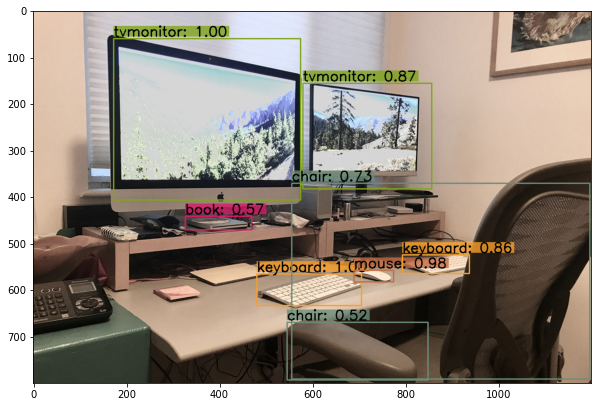

In [38]:
detection_recognition("E:/analytics/projects/yolo/home_office.jpg")

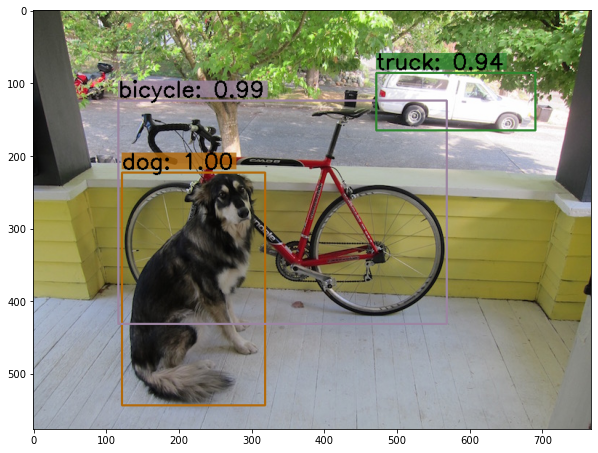

In [39]:
detection_recognition("E:/analytics/projects/yolo/dog.jpg")

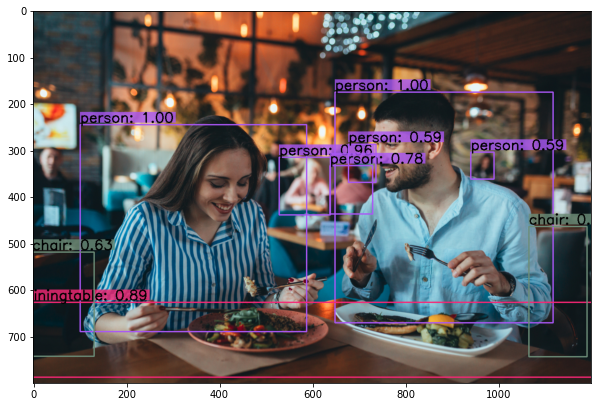

In [40]:
detection_recognition("E:/analytics/projects/yolo/Restaurant_Image.jpg")

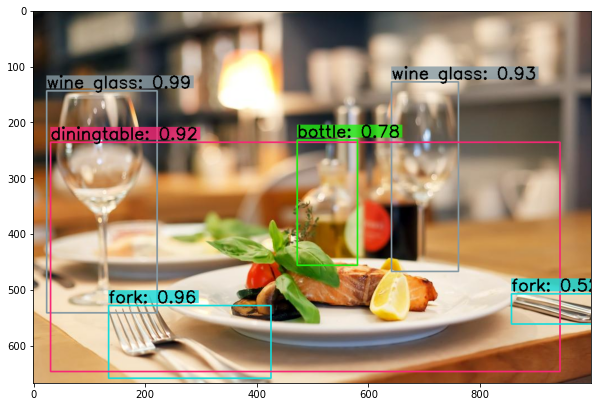

In [41]:
detection_recognition("E:/analytics/projects/yolo/Restaurant_Image1.jpg")